
## **Problem Statement:**  

Develop a predictive model  to forecast the next day's stock market closing price based on historical data, including open, high, low, volume, and adjusted close price to aid in informed decision-making. The following steps has to be performed for a complete analysis and evaluation.


DIFFERNT MODELS:

1. Hybrid Model: A combination of LSTM and Linear Regression.

2. Advanced Hybrid Model: A combination of Linear Regression, LSTM, SVR, and Random Forest.
  
3. Voting Regressor: An ensemble approach integrating the models from the second step.  


FEATURE ENGINEERING/FEATURE SELECTION:

Each model is evaluated using three different feature selection strategies:  

- Approach 1: Using Open, High, Low, Volume, and Adjusted Close as independent features.
  
- Approach 2: Using Open, High, and Low as independent features.
  
- Approach 3: Using Close as both the dependent and independent variable.  


List down nine different values of MAE, RMSE and R2 values, and conclude, which combination of feature and algorithm gives the best accuracy among all combinations.

### PREPROCESSING

In [ ]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#load data
df=pd.read_csv('apple_stock_data.csv')

In [ ]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2023-11-02 00:00:00+00:00,176.665985,177.570007,177.779999,175.460007,175.520004,77334800
1,2023-11-03 00:00:00+00:00,175.750671,176.649994,176.820007,173.350006,174.240005,79763700
2,2023-11-06 00:00:00+00:00,178.317520,179.229996,179.429993,176.210007,176.380005,63841300
3,2023-11-07 00:00:00+00:00,180.894333,181.820007,182.440002,178.970001,179.179993,70530000
4,2023-11-08 00:00:00+00:00,181.958893,182.889999,183.449997,181.589996,182.350006,49340300


In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.isnull().sum()

,0
Date,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       252 non-null    datetime64[ns, UTC]
 1   Adj Close  252 non-null    float64            
 2   Close      252 non-null    float64            
 3   High       252 non-null    float64            
 4   Low        252 non-null    float64            
 5   Open       252 non-null    float64            
 6   Volume     252 non-null    int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 13.9 KB


In [ ]:
df.set_index('Date',inplace=True)

<Axes: >

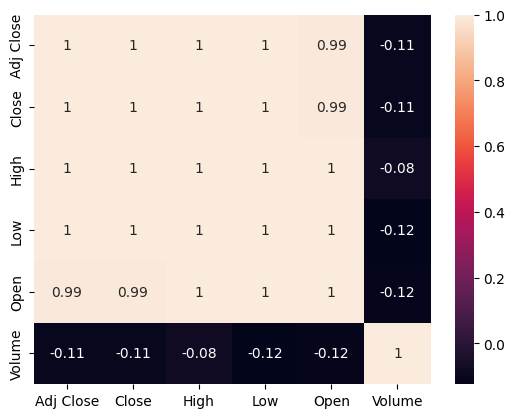

In [ ]:
cor=df.corr()
sns.heatmap(cor,annot=True)

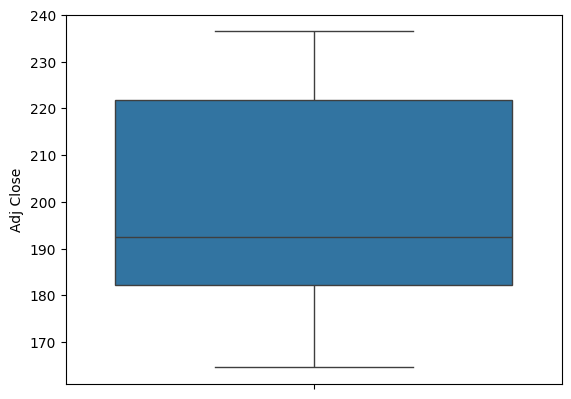

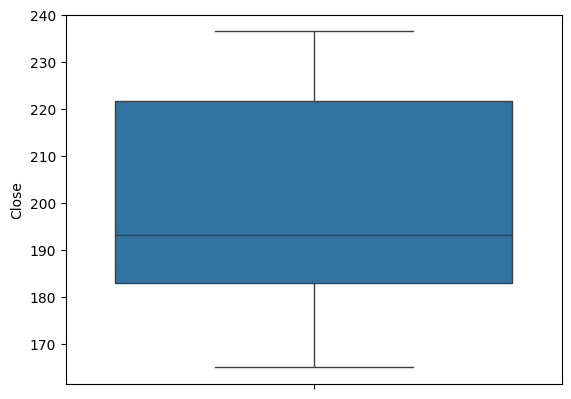

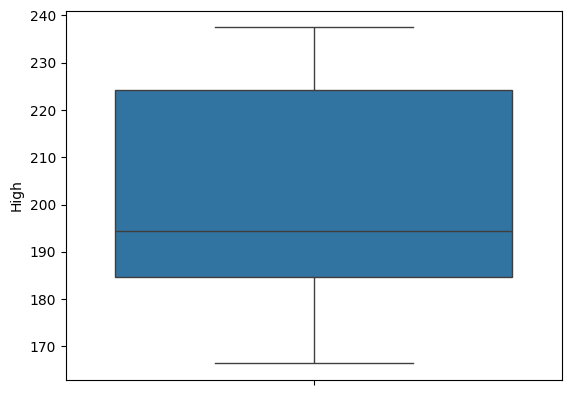

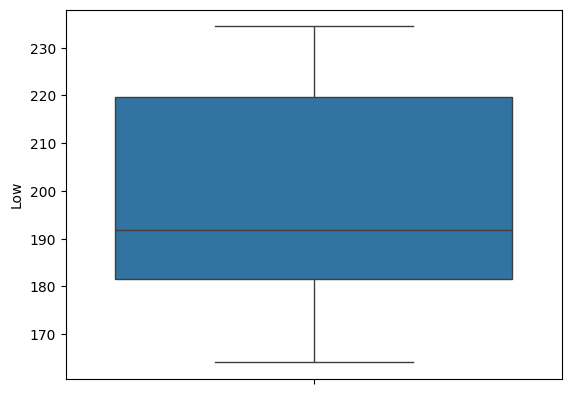

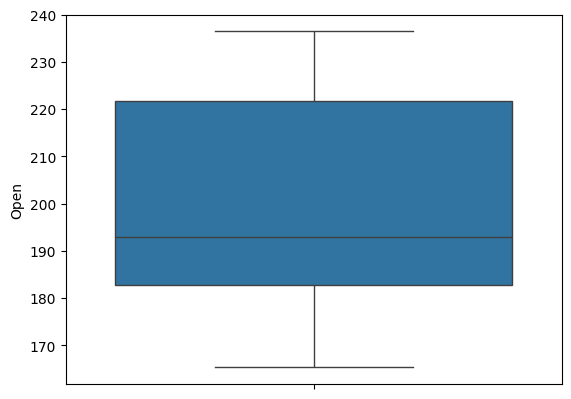

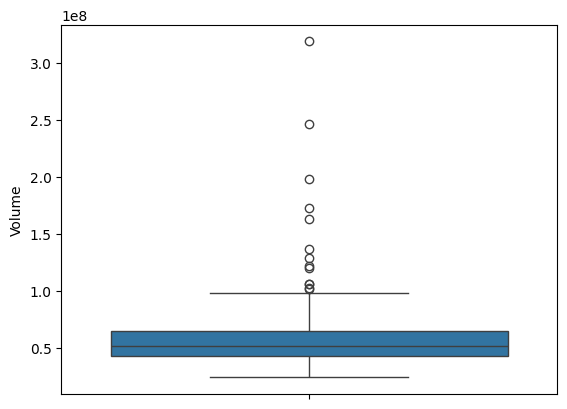

In [ ]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

in stock market the volume can not be considered as a outlier, it is considered as an anomaly

In [ ]:
# scale the dataframe
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns,index=df.index)

In [ ]:
df

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-11-02 00:00:00+00:00,0.168025,0.175853,0.160079,0.161717,0.142978,0.180858
2023-11-03 00:00:00+00:00,0.155294,0.162983,0.146575,0.131732,0.124982,0.189102
2023-11-06 00:00:00+00:00,0.190997,0.199077,0.183289,0.172375,0.155068,0.135060
2023-11-07 00:00:00+00:00,0.226839,0.235311,0.225630,0.211596,0.194433,0.157762
2023-11-08 00:00:00+00:00,0.241646,0.250280,0.239837,0.248828,0.238999,0.085843
...,...,...,...,...,...,...
2024-10-28 00:00:00+00:00,0.957159,0.956911,0.961176,0.973000,0.955574,0.040861
2024-10-29 00:00:00+00:00,0.960915,0.960688,0.955549,0.969732,0.952482,0.038587
2024-10-30 00:00:00+00:00,0.911258,0.910744,0.943452,0.930368,0.945593,0.078140


### **HYBRID MODEL (LSTM+LR)**

### APPROACH-1

**LINEAR REGRESSION**

In [ ]:
#import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error,mean_absolute_error,r2_score

#define dependent and independent features
x=df.drop(columns='Close')
y=df[['Close']]

#split the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

#initial modelling
model_lr11=LinearRegression()
model_lr11.fit(x_train,y_train)
y_pred_lr11=model_lr11.predict(x_test)

#evaluation metrics for linear regression model with all features as predictors
rmse_lr11=root_mean_squared_error(y_test,y_pred_lr11)
mae_lr11=mean_absolute_error(y_test,y_pred_lr11)
r2_lr11=r2_score(y_test,y_pred_lr11)
print(f'RMSE:{rmse_lr11}\nMAE:{mae_lr11}\nR2:{r2_lr11}')

RMSE:0.002739926804601374
MAE:0.0024596947423728053
R2:0.9999039580218739


**LSTM**

In [ ]:
print(x.shape)
print(y.shape)

(252, 5)
(252, 1)


In [ ]:
def create_sequences(features, target, time_steps=60):
    X, y = [], []
    for i in range(len(features) - time_steps):
        X.append(features[i:i+time_steps])
        y.append(target[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 60  # Use past 60 days for prediction
x_array=x.to_numpy()
y_array=y.to_numpy()
X, y = create_sequences(x_array, y_array, time_steps)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])


In [ ]:
print(X_train.shape)
print(x_test.shape)

(153, 60, 5)
(51, 5)


In [ ]:
import tensorflow as tf
tf.random.set_seed(42)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
model_lstm11 = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(time_steps, X_train.shape[2])),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),

    LSTM(units=50),
    Dense(units=30),

    Dense(units=1)  # Output layer (Predicting Close price)
])

model_lstm11.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model_lstm11.fit(X_train, y_train, epochs=20, batch_size=30, validation_data=(X_test, y_test))


Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 234ms/step - loss: 0.1309 - val_loss: 0.0349
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0264 - val_loss: 0.0622
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - loss: 0.0246 - val_loss: 0.0042
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 0.0140 - val_loss: 0.0041
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0122 - val_loss: 0.0095
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0128 - val_loss: 0.0056
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - loss: 0.0109 - val_loss: 0.0040
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - loss: 0.0111 - val_loss: 0.0042
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0102 - val_loss: 0.0042
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0097 - val_loss: 0.0047
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0095 - val_loss: 0.0041
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0094 - val_loss

In [ ]:
y_pred_lstm11 = model_lstm11.predict(X_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step


In [ ]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error,r2_score

mae_lstm11 = mean_absolute_error(y_test, y_pred_lstm11)
rmse_lstm11 = root_mean_squared_error(y_test, y_pred_lstm11)
r2_lstm11=r2_score(y_test,y_pred_lstm11)
print(f"MAE_LSTM11: {mae_lstm11:.2f}, RMSE_LSTM11: {rmse_lstm11:.2f}, R2_LSTM11: {r2_lstm11:.2f}")


MAE_LSTM11: 0.05, RMSE_LSTM11: 0.06, R2_LSTM11: 0.20


**HYBRID**

In [ ]:
# Reshape Linear Regression predictions to match LSTM predictions
y_pred_lr11 = y_pred_lr11[-len(y_pred_lstm11):]  # Ensure equal length

# Convert to NumPy arrays
y_pred_lr11 = np.array(y_pred_lr11)
y_pred_lstm11 = np.array(y_pred_lstm11)

# Hybrid Prediction: Weighted Average of Linear Regression & LSTM
alpha = 0.6  # Weight for LSTM (Adjustable)
y_pred_h11 = alpha * y_pred_lstm11 + (1 - alpha) * y_pred_lr11


In [ ]:
y_test.shape
y_pred_h11.shape

(39, 1)

In [ ]:
# # Reverse scaling to original stock prices
# y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
# y_pred_hybrid_actual = scaler.inverse_transform(y_pred_hybrid)

# Evaluation Metrics
mae_h11 = mean_absolute_error(y_test, y_pred_h11)
rmse_h11 = root_mean_squared_error(y_test, y_pred_h11)
r2_h11 = r2_score(y_test, y_pred_h11)

#print(f"MAE_H11: {mae_h11:.2f}, RMSE_H11: {rmse_h11:.2f}, R2_H11: {r2_h11:.4f}")
from tabulate import tabulate

# Define the model name as a heading
model_name11 = "Hybrid Model: LR-All Features & LSTM (60 Days Close Price)"

# Define the table structure
data11 = [
    ["MAE", f"{mae_h11:.4f}"],
    ["RMSE", f"{rmse_h11:.4f}"],
    ["R²", f"{r2_h11:.4f}"]
]

# Create DataFrame
df11 = pd.DataFrame(data11, columns=["Metric", "Value"])

# Print the heading
print(f"\n{model_name11}\n" + "=" * len(model_name11))

# Print the table without the model column
print(tabulate(df11, headers="keys", tablefmt="grid", showindex=False))


Hybrid Model: LR-All Features & LSTM (60 Days Close Price)
+----------+---------+
| Metric   |   Value |
+==========+=========+
| MAE      |  0.1861 |
+----------+---------+
| RMSE     |  0.2121 |
+----------+---------+
| R²       | -8.5961 |
+----------+---------+


### APPROACH 2

**LINEAR REGRESSION**

In [ ]:
df.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [ ]:
x=df[['Open','High','Low']]
y=df[['Close']]

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

model_lr12=LinearRegression()
model_lr12.fit(x_train,y_train)
y_pred_lr12=model_lr12.predict(x_test)

mae_lr12=mean_absolute_error(y_test,y_pred_lr12)
rmse_lr12=root_mean_squared_error(y_test,y_pred_lr12)
r2_lr12=r2_score(y_test,y_pred_lr12)
print(f"RMSE_LR12:{rmse_lr12}\nMAE_LR12:{mae_lr12}\nR2_LR12:{r2_lr12}")

RMSE_LR12:0.012423550636731834
MAE_LR12:0.010099101693279294
R2_LR12:0.9980254204122807


In [ ]:
#LSTM
def create_sequences(features, target, time_steps=60):
    X, y = [], []
    for i in range(len(features) - time_steps):
        X.append(features[i:i+time_steps])
        y.append(target[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 60  # Use past 60 days for prediction
x_array=x.to_numpy()
y_array=y.to_numpy()
X, y = create_sequences(x_array, y_array, time_steps)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
model_lstm12 = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(time_steps, X_train.shape[2])),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),

    LSTM(units=50),
    Dense(units=30),

    Dense(units=1)  # Output layer (Predicting Close price)
])

model_lstm12.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model_lstm12.fit(X_train, y_train, epochs=20, batch_size=30, validation_data=(X_test, y_test))
y_pred_lstm12=model_lstm12.predict(X_test)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 237ms/step - loss: 0.0624 - val_loss: 0.0173
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0259 - val_loss: 0.0196
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - loss: 0.0152 - val_loss: 0.0089
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - loss: 0.0140 - val_loss: 0.0132
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0143 - val_loss: 0.0039
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.0113 - val_loss: 0.0043
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0110 - val_loss: 0.0044
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0104 - val_loss: 0.0045
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0101 - val_loss: 0.0047
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0091 - val_loss: 0.0042
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0090 - val_loss: 0.0096
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0094 - val_lo

In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

mae_lstm12 = mean_absolute_error(y_test, y_pred_lstm12)
rmse_lstm12 = root_mean_squared_error(y_test, y_pred_lstm12)
r2_lstm12=r2_score(y_test,y_pred_lstm12)
print(f"MAE_LSTM12: {mae_lstm12:.2f}\nRMSE_LSTM12: {rmse_lstm12:.2f}\nR2_LSTM12: {r2_lstm12:.2f}")


MAE_LSTM12: 0.05
RMSE_LSTM12: 0.06
R2_LSTM12: 0.12


In [ ]:
#hybrid
# Reshape Linear Regression predictions to match LSTM predictions
y_pred_lr12= y_pred_lr12[-len(y_pred_lstm12):]  # Ensure equal length

# Convert to NumPy arrays
y_pred_lr12 = np.array(y_pred_lr12)
y_pred_lstm = np.array(y_pred_lstm12)

# Hybrid Prediction: Weighted Average of Linear Regression & LSTM
alpha = 0.6  # Weight for LSTM (Adjustable)
y_pred_hybrid = alpha * y_pred_lstm + (1 - alpha) * y_pred_lr12


# Evaluation Metrics
mae_h12 = mean_absolute_error(y_test, y_pred_hybrid)
rmse_h12 = root_mean_squared_error(y_test, y_pred_hybrid)
r2_h12 = r2_score(y_test, y_pred_hybrid)

# Define the model name as a heading
model_name12 = "Hybrid Model: LR- OHL & LSTM-All Features"

# Define the table structure
data12 = [
    ["MAE", f"{mae_h12:.4f}"],
    ["RMSE", f"{rmse_h12:.4f}"],
    ["R²", f"{r2_h12:.4f}"]
]

# Create DataFrame
df12 = pd.DataFrame(data12, columns=["Metric", "Value"])

# Print the heading
print(f"\n{model_name12}\n" + "=" * len(model_name12))

# Print the table without the model column
print(tabulate(df12, headers="keys", tablefmt="grid", showindex=False))


Hybrid Model: LR- OHL & LSTM-All Features
+----------+---------+
| Metric   |   Value |
+==========+=========+
| MAE      |  0.1844 |
+----------+---------+
| RMSE     |  0.211  |
+----------+---------+
| R²       | -8.5035 |
+----------+---------+


### APPROACH-3

In [ ]:
data=df[['Close']]
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
data['Lag_1']=df['Close'].shift(1)
data['Lag_2']=df['Close'].shift(2)
data['Lag_3']=df['Close'].shift(3)
data.dropna(inplace=True)

In [ ]:
x=data[['Lag_1','Lag_2','Lag_3']]
y=df[['Close']]

<Axes: >

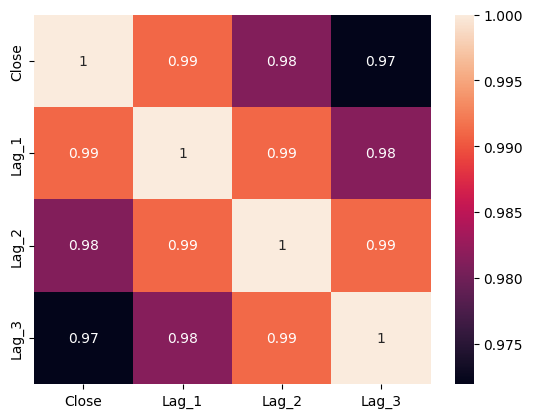

In [ ]:
cor=data.corr()
sns.heatmap(cor,annot=True)

In [ ]:
train_size=int(len(x)*0.8)
print(train_size)
x_train,x_test=x[:train_size],x[train_size:]
y_train,y_test=y[:train_size],y[train_size:]


199


In [ ]:
x_test.shape

(50, 3)

In [ ]:
from sklearn.linear_model import LinearRegression
model_lr13=LinearRegression()
model_lr13.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred_lr13=model_lr13.predict(x_test)


In [ ]:
y_test=y_test[-len(x_test):]

In [ ]:
y_test.shape

(50, 1)

In [ ]:
y_pred_lr13.shape

(50, 1)

In [ ]:
mae_lr13=mean_absolute_error(y_test,y_pred_lr13)
rmse_lr13=root_mean_squared_error(y_test,y_pred_lr13)
r2_lr13=r2_score(y_test,y_pred_lr13)

In [ ]:
print(f'RMSE_LR13:{rmse_lr13}\nMAE_LR13:{mae_lr13}\nR2_LR13:{r2_lr13}')

RMSE_LR13:0.06631425026466725
MAE_LR13:0.050895335331548865
R2_LR13:-0.003622842156925543


**LSTM**

In [ ]:
#Now prepare the data for LSTM by creating sequences of a defined length (e.g., 60 days) to predict the next day’s price:
def create_sequences(df, seq_length=60):
    X, y=[], []
    for i in range(len(df) - seq_length):
        X.append(df[i:i+seq_length])
        y.append(df[i+seq_length])
    return np.array(X), np.array(y)

seq_length=60
X,y=create_sequences(df['Close'].values,seq_length)

In [ ]:
X.shape

(192, 60)

In [ ]:
# split the sequences into training and test sets (eg, 80% training, 20% testing)
train_size=int(len(X)*0.8)
X_train,X_test=X[:train_size],X[train_size:]
y_train,y_test=y[:train_size],y[train_size:]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

model_lstm13=Sequential()
model_lstm13.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model_lstm13.add(LSTM(units=50))
model_lstm13.add(Dense(1))

In [ ]:
#compile the model using an appropriate optimizer and loss function
model_lstm13.compile(optimizer='adam', loss='mean_squared_error')
model_lstm13.fit(X_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.2771
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0757
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 0.0278
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0193
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 0.0158
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0156
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0097
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0105
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0087
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0081
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0077
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0072
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0072
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0070
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0069
Epoch 16/20
5/5 ━━━━━━━━━━━━━━━━━━

In [ ]:
y_pred_lstm13=model_lstm13.predict(X_test)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 367ms/step


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_pred_lstm13.shape)
print(y_test.shape)

(153, 60)
(153,)
(39, 60)
(39, 1)
(39,)


In [ ]:
rmse_lstm13=root_mean_squared_error(y_test,y_pred_lstm13)
mae_lstm13=mean_absolute_error(y_test,y_pred_lstm13)
r2_lstm13=r2_score(y_test,y_pred_lstm13)

In [ ]:
print(f'MSE_LSTM13:{rmse_lstm13}\nMAE_LSTM13:{mae_lstm13}\nR2_LSTM13:{r2_lstm13}')

MSE_LSTM13:0.059893525782298375
MAE_LSTM13:0.04919950524198281
R2_LSTM13:0.23448275095171411


**HYBRID**

In [ ]:
y_pred_lr13=y_pred_lstm13[-len(y_pred_lstm13):]
alpha=0.6
hybrid13=alpha*y_pred_lstm13+(1-alpha)*y_pred_lr13

rmse_h13=root_mean_squared_error(y_test,hybrid13)
mae_h13=mean_absolute_error(y_test,hybrid13)
r2_h13=r2_score(y_test,hybrid13)

# Define the model name as a heading
model_name13 = "Hybrid Model: LR- LFM & LSTM- 60 days close price."

# Define the table structure
data13 = [
    ["MAE", f"{mae_h13:.4f}"],
    ["RMSE", f"{rmse_h13:.4f}"],
    ["R²", f"{r2_h13:.4f}"]
]

# Create DataFrame
df13 = pd.DataFrame(data13, columns=["Metric", "Value"])

# Print the heading
print(f"\n{model_name13}\n" + "=" * len(model_name13))

# Print the table without the model column
print(tabulate(df13, headers="keys", tablefmt="grid", showindex=False))


Hybrid Model: LR- LFM & LSTM- 60 days close price.
+----------+---------+
| Metric   |   Value |
+==========+=========+
| MAE      |  0.0492 |
+----------+---------+
| RMSE     |  0.0599 |
+----------+---------+
| R²       |  0.2345 |
+----------+---------+


### **HYBRID2(LSTM+LR+SVR+RF)**

### APPROACH1

In [ ]:
#Linear regression
#import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#define dependent and independent features
x=df.drop(columns='Close')
y=df[['Close']]

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

model_lr21=LinearRegression()
model_lr21.fit(x_train,y_train)
y_pred_lr21=model_lr21.predict(x_test)

#evaluation metrics for linear regression model with all features as predictors
rmse_lr21=root_mean_squared_error(y_test,y_pred_lr21)
mae_lr21=mean_absolute_error(y_test,y_pred_lr21)
r2_lr21=r2_score(y_test,y_pred_lr21)
print(f'RMSE: {rmse_lr21}\n MAE: {mae_lr21} \n R2: {r2_lr21}')

RMSE: 0.002739926804601374
 MAE: 0.0024596947423728053 
 R2: 0.9999039580218739


In [ ]:
#LSTM
import tensorflow as tf
# tf.random.set_seed(42)
x=df.drop(columns='Close')
y=df[['Close']]
def create_sequences(features, target, time_steps=60):
    X, y = [], []
    for i in range(len(features) - time_steps):
        X.append(features[i:i+time_steps])
        y.append(target[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 60  # Use past 60 days for prediction
x_array=x.to_numpy()
y_array=y.to_numpy()
X, y = create_sequences(x_array,y_array, time_steps)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])



from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
model_lstm21 = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(time_steps, X_train.shape[2])),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),

    LSTM(units=50),
    Dense(units=30),

    Dense(units=1)  # Output layer (Predicting Close price)
])

model_lstm21.compile(optimizer='adam', loss='mean_squared_error')
model_lstm21.fit(X_train,y_train,epochs=20,batch_size=32,validation_data=(X_test,y_test))
y_pred_lstm21=model_lstm21.predict(X_test)


from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae_lstm21 = mean_absolute_error(y_test, y_pred_lstm21)
rmse_lstm21 = root_mean_squared_error(y_test, y_pred_lstm21)
r2_lstm21=r2_score(y_test,y_pred_lstm21)
print(f"\n\n\nMAE_LSTM21: {mae_lstm21:.2f}\n, RMSE_LSTM21: {rmse_lstm21:.2f}\n, R2_LSTM21: {r2_lstm21:.2f}")


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 394ms/step - loss: 0.1758 - val_loss: 0.0353
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 0.0437 - val_loss: 0.0308
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - loss: 0.0226 - val_loss: 0.0322
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 0.0155 - val_loss: 0.0096
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - loss: 0.0167 - val_loss: 0.0051
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 0.0129 - val_loss: 0.0096
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.0113 - val_loss: 0.0060
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 0.0119 - val_loss: 0.0040
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 0.0102 - val_loss: 0.0050
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 0.0099 - val_loss: 0.0041
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 0.0092 - val_loss: 0.0060
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 0.0089 - val_lo

In [ ]:
#SVR
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
x=df.drop(columns='Close')
y=df[['Close']]

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)


model_svr21=SVR(kernel='rbf')
model_svr21.fit(x_train,y_train)
y_pred_svr21=model_svr21.predict(x_test)

rmse_svr21=root_mean_squared_error(y_test,y_pred_svr21)
mae_svr21=mean_absolute_error(y_test,y_pred_svr21)
r2_svr21=r2_score(y_test,y_pred_svr21)
print(f'RMSE_SVR21:{rmse_svr21}\nMAE_SVR21:{mae_svr21}\nR2_SVR21:{r2_svr21}')



RMSE_SVR21:0.05254948092659324
MAE_SVR21:0.045554053830079454
R2_SVR21:0.9646719199907317


In [ ]:
#random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
x=df.drop(columns='Close')
y=df[['Close']]

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
model_rf21=RandomForestRegressor()
model_rf21.fit(x_train,y_train)
y_pred_rf21=model_rf21.predict(x_test)

rmse_rf21=root_mean_squared_error(y_test,y_pred_rf21)
mae_rf21=mean_absolute_error(y_test,y_pred_rf21)
r2_rf21=r2_score(y_test,y_pred_rf21)
print(f'RMSE_RF21:{rmse_rf21}\nMAE_RF21:{mae_rf21}\nR2_RF21:{r2_rf21}')

RMSE_RF21:0.0071829732431249555
MAE_RF21:0.0046287655414643
R2_RF21:0.9993399274512241


In [ ]:
#hybrid
# Reshape Linear Regression predictions to match LSTM predictions
y_pred_lr21 = y_pred_lr21[-len(y_pred_lstm21):]  # Ensure equal length
y_pred_svr21=y_pred_svr21[-len(y_pred_lstm21):]
y_pred_rf21=y_pred_rf21[-len(y_pred_lstm21):]
y_test=y_test[-len(y_pred_lstm21):]

# Convert to NumPy arrays
y_pred_lr21 = np.array(y_pred_lr21).reshape(-1,1)
y_pred_lstm21 = np.array(y_pred_lstm21).reshape(-1,1)
y_pred_svr21=np.array(y_pred_svr21).reshape(-1,1)
y_pred_rf21=np.array(y_pred_rf21).reshape(-1,1)
print(y_pred_rf21.shape)
print(y_pred_svr21.shape)
print(y_test.shape)
# Hybrid Prediction: Weighted Average of Linear Regression & LSTM
alpha = 0.25  # Weight for LSTM (Adjustable)
y_pred_h21 = 0.25 * y_pred_lstm21 + 0.25* y_pred_lr21+0.25*y_pred_svr21+0.25*y_pred_rf21

mae_h21=mean_absolute_error(y_test,y_pred_h21)
rmse_h21=root_mean_squared_error(y_test,y_pred_h21)
r2_h21=r2_score(y_test,y_pred_h21)
#print(f"MAE_H21: {mae_h21:.2f}\nRMSE_H21: {rmse_h21:.2f}\nR2_H21: {r2_h21:.4f}")
# Define the model name as a heading
model_name21 = "LR, LSTM, SVR and RF uses all features."

# Define the table structure
data21 = [
    ["MAE", f"{mae_h21:.4f}"],
    ["RMSE", f"{rmse_h21:.4f}"],
    ["R²", f"{r2_h21:.4f}"]
]

# Create DataFrame
df21 = pd.DataFrame(data21, columns=["Metric", "Value"])

# Print the heading
print(f"\n{model_name21}\n" + "=" * len(model_name21))

# Print the table without the model column
print(tabulate(df21, headers="keys", tablefmt="grid", showindex=False))

(39, 1)
(39, 1)
(39, 1)

LR, LSTM, SVR and RF uses all features.
+----------+---------+
| Metric   |   Value |
+==========+=========+
| MAE      |  0.1153 |
+----------+---------+
| RMSE     |  0.132  |
+----------+---------+
| R²       |  0.7544 |
+----------+---------+


### APPROACH-2

In [ ]:
#linear regression
x=df[['Open','High','Low']]
y=df[['Close']]

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

model_lr22=LinearRegression()
model_lr22.fit(x_train,y_train)
y_pred_lr22=model_lr22.predict(x_test)

mae_lr22=mean_absolute_error(y_test,y_pred_lr22)
rmse_lr22=root_mean_squared_error(y_test,y_pred_lr22)
r2_lr22=r2_score(y_test,y_pred_lr22)
print(f"RMSE_LR22:{rmse_lr22}\nMAE_LR22:{mae_lr22}\nR2_LR22:{r2_lr22}")

RMSE_LR22:0.012423550636731834
MAE_LR22:0.010099101693279294
R2_LR22:0.9980254204122807


In [ ]:
#LSTM
x=df[['Open','High','Low']]
y=df[['Close']]
def create_sequences(features, target, time_steps=60):
    X, y = [], []
    for i in range(len(features) - time_steps):
        X.append(features[i:i+time_steps])
        y.append(target[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 60  # Use past 60 days for prediction
x_array=x.to_numpy()
y_array=y.to_numpy()
X, y = create_sequences(x_array, y_array, time_steps)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
model_lstm22 = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(time_steps, X_train.shape[2])),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),

    LSTM(units=50),
    Dense(units=30),

    Dense(units=1)  # Output layer (Predicting Close price)
])

model_lstm22.compile(optimizer='adam', loss='mean_squared_error')

model_lstm22.fit(X_train, y_train, epochs=20, batch_size=30, validation_data=(X_test, y_test))
y_pred_lstm22=model_lstm22.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

mae_lstm22 = mean_absolute_error(y_test, y_pred_lstm22)
rmse_lstm22 = root_mean_squared_error(y_test, y_pred_lstm22)
r2_lstm22=r2_score(y_test,y_pred_lstm22)
print(f"MAE_LSTM22: {mae_lstm22:.2f}\nRMSE_LSTM22: {rmse_lstm22:.2f}\nR2_LSTM22: {r2_lstm22:.2f}")



Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 235ms/step - loss: 0.1226 - val_loss: 0.0390
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0326 - val_loss: 0.0638
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0286 - val_loss: 0.0056
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0148 - val_loss: 0.0046
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.0141 - val_loss: 0.0113
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0135 - val_loss: 0.0072
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - loss: 0.0126 - val_loss: 0.0045
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0121 - val_loss: 0.0042
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 0.0107 - val_loss: 0.0043
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - loss: 0.0101 - val_loss: 0.0048
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - loss: 0.0096 - val_loss: 0.0054
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - loss: 0.0102 - val_lo

In [ ]:
#SVR

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
x=df.drop(columns=['Close','Volume','Adj Close'])
y=df[['Close']]

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)


model_svr22=SVR(kernel='rbf')
model_svr22.fit(x_train,y_train)
y_pred_svr22=model_svr22.predict(x_test)

rmse_svr22=root_mean_squared_error(y_test,y_pred_svr22)
mae_svr22=mean_absolute_error(y_test,y_pred_svr22)
r2_svr22=r2_score(y_test,y_pred_svr22)
print(f'RMSE_SVR22:{rmse_svr22}\nMAE_SVR22:{mae_svr22}\nR2_SVR22:{r2_svr22}')



RMSE_SVR22:0.048995334329952
MAE_SVR22:0.042890592712431785
R2_SVR22:0.9692890942425318


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
x=df.drop(columns=['Close','Volume','Adj Close'])
y=df[['Close']]

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
model_rf22=RandomForestRegressor()
model_rf22.fit(x_train,y_train)
y_pred_rf22=model_rf22.predict(x_test)

rmse_rf22=root_mean_squared_error(y_test,y_pred_rf22)
mae_rf22=mean_absolute_error(y_test,y_pred_rf22)
r2_rf22=r2_score(y_test,y_pred_rf22)
print(f'RMSE_RF22:{rmse_rf22}\nMAE_RF22:{mae_rf22}\nR2_RF22:{r2_rf22}')

RMSE_RF22:0.019317230839018117
MAE_RF22:0.013808759027132729
R2_RF22:0.995226104440859


In [ ]:
#hybrid
# Reshape Linear Regression predictions to match LSTM predictions
y_pred_lr22 = y_pred_lr22[-len(y_pred_lstm22):]  # Ensure equal length
y_pred_svr22=y_pred_svr22[-len(y_pred_lstm22):]
y_pred_rf22=y_pred_rf22[-len(y_pred_lstm22):]
y_test=y_test[-len(y_pred_lstm22):]

# Convert to NumPy arrays
y_pred_lr22 = np.array(y_pred_lr22).reshape(-1,1)
y_pred_lstm22 = np.array(y_pred_lstm22).reshape(-1,1)
y_pred_svr22=np.array(y_pred_svr22).reshape(-1,1)
y_pred_rf22=np.array(y_pred_rf22).reshape(-1,1)
print(y_pred_rf22.shape)
print(y_pred_svr22.shape)
print(y_test.shape)

alpha = 0.25
y_pred_h22 = 0.25 * y_pred_lstm22 + 0.25* y_pred_lr22+0.25*y_pred_svr22+0.25*y_pred_rf22

mae_h22=mean_absolute_error(y_test,y_pred_h22)
rmse_h22=root_mean_squared_error(y_test,y_pred_h22)
r2_h22=r2_score(y_test,y_pred_h22)
#print(f"MAE_H22: {mae_h22:.2f}\nRMSE_H22: {rmse_h22:.2f}\nR2_H22: {r2_h22:.4f}")

# Define the model name as a heading
model_name22 = "LR, LSTM, SVR and RF-OHL"

# Define the table structure
data22 = [
    ["MAE", f"{mae_h22:.4f}"],
    ["RMSE", f"{rmse_h22:.4f}"],
    ["R²", f"{r2_h22:.4f}"]
]

# Create DataFrame
df22 = pd.DataFrame(data22, columns=["Metric", "Value"])

# Print the heading
print(f"\n{model_name22}\n" + "=" * len(model_name22))

# Print the table without the model column
print(tabulate(df22, headers="keys", tablefmt="grid", showindex=False))

(39, 1)
(39, 1)
(39, 1)

LR, LSTM, SVR and RF-OHL
+----------+---------+
| Metric   |   Value |
+==========+=========+
| MAE      |  0.1234 |
+----------+---------+
| RMSE     |  0.1401 |
+----------+---------+
| R²       |  0.7232 |
+----------+---------+


### APPROACH 3

In [ ]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
data=df[['Close']]
from warnings import filterwarnings
filterwarnings('ignore')


data['Lag_1']=df['Close'].shift(1)
data['Lag_2']=df['Close'].shift(2)
data['Lag_3']=df['Close'].shift(3)
data.dropna(inplace=True)


x=data[['Lag_1','Lag_2','Lag_3']]
y=data[['Close']]


train_size=int(len(y)*0.8)
x_train,x_test=x[:train_size],x[train_size:]
y_train,y_test=y[:train_size],y[train_size:]


model_lr23=LinearRegression()
model_lr23.fit(x_train,y_train)
y_pred_lr23=model_lr23.predict(x_test)

rmse_lr23=root_mean_squared_error(y_test,y_pred_lr23)
mae_lr23=mean_absolute_error(y_test,y_pred_lr23)
r2_lr23=r2_score(y_test,y_pred_lr23)

print(f'RMSE_LR23 : {rmse_lr23}\nMAE_LR23 : {mae_lr23}\nR2_LR23 : {r2_lr23}')




RMSE_LR23 : 0.04179778981751835
MAE_LR23 : 0.031797050717774965
R2_LR23 : 0.6012842009827444


**LSTM**

LSTM (Long Short-Term Memory) is a type of recurrent neural network (RNN) architecture designed to handle sequence prediction problems and capture long-term dependencies in data. It was introduced to overcome the limitations of traditional RNNs, such as the vanishing and exploding gradient problems.



In [ ]:
#LSTM
data=df[['Close']]
def create_sequences(df, seq_length=60):
    X, y=[], []
    for i in range(len(df) - seq_length):
        X.append(df[i:i+seq_length])
        y.append(df[i+seq_length])
    return np.array(X), np.array(y)

seq_length=60
X,y=create_sequences(data['Close'].values,seq_length)

# split the sequences into training and test sets (eg, 80% training, 20% testing)
train_size=int(len(X)*0.8)
X_train,X_test=X[:train_size],X[train_size:]
y_train,y_test=y[:train_size],y[train_size:]

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

model_lstm23=Sequential()
model_lstm23.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model_lstm23.add(LSTM(units=50))
model_lstm23.add(Dense(1))

#compile the model using an appropriate optimizer and loss function
model_lstm23.compile(optimizer='adam', loss='mean_squared_error')
model_lstm23.fit(X_train,y_train,epochs=20,batch_size=32)

#make predictions on using LSTM on the test set and inverse transform the scaled predictions
X_test_lstm=X_test.reshape((X_test.shape[0],X_test.shape[1],1))
y_pred_lstm23=model_lstm23.predict(X_test_lstm)


rmse_lstm23=root_mean_squared_error(y_test,y_pred_lstm23)
mae_lstm23=mean_absolute_error(y_test,y_pred_lstm23)
r2_lstm23=r2_score(y_test,y_pred_lstm23)

print(f'RMSE_LSTM23 : {rmse_lstm23}\nMAE_LSTM23 : {mae_lstm23}\nR2_LSTM23 : {r2_lstm23}')



Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 0.2812
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0624
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0400
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0168
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0195
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0149
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0111
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0119
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0095
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0094
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0084
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - loss: 0.0085
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0081
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0078
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0075
Epoch 16/20
5/5 ━━━━━━━━━━━━━━━━

In [ ]:
#SVR
data=df[['Close']]
from warnings import filterwarnings
filterwarnings('ignore')


data['Lag_1']=df['Close'].shift(1)
data['Lag_2']=df['Close'].shift(2)
data['Lag_3']=df['Close'].shift(3)
data.dropna(inplace=True)

x=data[['Lag_1','Lag_2','Lag_3']]
y=data[['Close']]


train_size=int(len(y)*0.8)
x_train,x_test=x[:train_size],x[train_size:]
y_train,y_test=y[:train_size],y[train_size:]

from sklearn.svm import SVR
model_svr23=SVR()
model_svr23.fit(x_train,y_train)
y_pred_svr23=model_svr23.predict(x_test)

rmse_svr23=root_mean_squared_error(y_test,y_pred_svr23)
mae_svr23=mean_absolute_error(y_test,y_pred_svr23)
r2_svr23=r2_score(y_test,y_pred_svr23)

print(f'RMSE_SVR23 : {rmse_svr23}\nMAE_SVR23 : {mae_svr23}\nR2_SVR23 : {r2_svr23}')


RMSE_SVR23 : 0.057074777739191986
MAE_SVR23 : 0.047117868923356274
R2_SVR23 : 0.25656112466489056


In [ ]:
#Random Forest
data=df[['Close']]
from warnings import filterwarnings
filterwarnings('ignore')


data['Lag_1']=df['Close'].shift(1)
data['Lag_2']=df['Close'].shift(2)
data['Lag_3']=df['Close'].shift(3)
data.dropna(inplace=True)

x=data[['Lag_1','Lag_2','Lag_3']]
y=data[['Close']]


train_size=int(len(y)*0.8)
x_train,x_test=x[:train_size],x[train_size:]
y_train,y_test=y[:train_size],y[train_size:]

from sklearn.ensemble import RandomForestRegressor
model_rf_23=RandomForestRegressor()
model_rf_23.fit(x_train,y_train)
y_pred_rf23=model_rf_23.predict(x_test)

rmse_rf23=root_mean_squared_error(y_test,y_pred_rf23)
mae_rf23=mean_absolute_error(y_test,y_pred_rf23)
r2_rf23=r2_score(y_test,y_pred_rf23)

print(f'RMSE_RF23 : {rmse_rf23}\nMAE_RF23 : {mae_rf23}\nR2_RF23 : {r2_rf23}')

RMSE_RF23 : 0.04835348636924774
MAE_RF23 : 0.03956010778495009
R2_RF23 : 0.46640420910154134


**Choosing the hybrid models**

LSTM (Long Short-Term Memory) and Linear Regression models will be used for this task. LSTM effectively captures sequential dependencies and patterns in time-series data, which makes it suitable for modelling stock price movements influenced by historical trends.

Linear Regression, on the other hand, is a straightforward model that captures simple linear relationships and long-term trends in data. By combining these two models into a hybrid approach, we leverage the LSTM’s ability to model complex time-dependent patterns alongside the Linear Regression’s ability to identify and follow broader trends. This combination aims to create a more balanced and accurate prediction system.

In [ ]:
#Hybrid


y_pred_lr23 = y_pred_lr23[-len(y_pred_lstm23):]  # Ensure equal length
y_pred_svr23=y_pred_svr23[-len(y_pred_lstm23):]
y_pred_rf23=y_pred_rf23[-len(y_pred_lstm23):]
y_test=y_test[-len(y_pred_lstm23):]

# Convert to NumPy arrays
y_pred_lr23 = np.array(y_pred_lr23).reshape(-1,1)
y_pred_lstm23 = np.array(y_pred_lstm23).reshape(-1,1)
y_pred_svr23=np.array(y_pred_svr23).reshape(-1,1)
y_pred_rf23=np.array(y_pred_rf23).reshape(-1,1)
print(y_pred_rf23.shape)
print(y_pred_svr23.shape)
print(y_test.shape)

alpha = 0.25
y_pred_h23 = 0.25 * y_pred_lstm23 + 0.25* y_pred_lr23+0.25*y_pred_svr23+0.25*y_pred_rf23

mae_h23=mean_absolute_error(y_test,y_pred_h23)
rmse_h23=root_mean_squared_error(y_test,y_pred_h23)
r2_h23=r2_score(y_test,y_pred_h23)
#print(f"MAE_H23: {mae_h23}\nRMSE_H23: {rmse_h23}\nR2_H23: {r2_h23}")


# Define the model name as a heading
model_name23 = "LR, SVR and RF-LFM & LSTM- 60 days close price."

# Define the table structure
data23 = [
    ["MAE", f"{mae_h23:.4f}"],
    ["RMSE", f"{rmse_h23:.4f}"],
    ["R²", f"{r2_h23:.4f}"]
]

# Create DataFrame
df23 = pd.DataFrame(data23, columns=["Metric", "Value"])

# Print the heading
print(f"\n{model_name23}\n" + "=" * len(model_name23))

# Print the table without the model column
print(tabulate(df23, headers="keys", tablefmt="grid", showindex=False))

(39, 1)
(39, 1)
(39, 1)

LR, SVR and RF-LFM & LSTM- 60 days close price.
+----------+---------+
| Metric   |   Value |
+==========+=========+
| MAE      |  0.0372 |
+----------+---------+
| RMSE     |  0.0468 |
+----------+---------+
| R²       |  0.5328 |
+----------+---------+


### MODEL-3(VOTING REGRESSOR)

### APPROACH 1

In [ ]:
models={
    'LinearRegression':LinearRegression(),
    'svr':SVR(),
    'RandomForestRegressor':RandomForestRegressor()
}

In [ ]:
from sklearn.ensemble import VotingClassifier
voting_clf=VotingClassifier(
    estimators=[(name,model) for name, model in models.items()],
    voting='hard'
)

In [ ]:
x=df[['Open','High','Low','Volume','Adj Close']]
y=df[['Close']]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)


In [ ]:
voting_clf.fit(x_train,y_train)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
# from  sklearn.ensemble import VotingClassifier,RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.svm import SVR
# x=df[['Open','High','Low','Volume','Adj Close']]
# y=df[['Close']]
# x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
# lr = LinearRegression()
# svr = SVR()
# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# vot_rgsr31=VotingClassifier(estimators=[('lr', lr), ('svr', svr), ('rf', rf)])

# vot_rgsr31.fit(x_train,y_train)
# y_pred_vr31=vot_rgsr31.predict(x_test)


# rmse_vr31=root_mean_squared_error(y_test,y_pred_vr31)
# mae_vr31=mean_absolute_error(y_test,y_pred_vr31)
# r2_vr31=r2_score(y_test,y_pred_vr31)

# print(f'RMSE_VR31 : {rmse_vr31}\nMAE_VR31 : {mae_vr31}\nR2_VR31 : {r2_vr31}')


In [ ]:
from  sklearn.ensemble import VotingRegressor
x=df[['Open','High','Low','Volume','Adj Close']]
y=df[['Close']]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
lr = LinearRegression()
svr = SVR()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
vot_rgsr31=VotingRegressor(estimators=[('lr', lr), ('svr', svr), ('rf', rf)])

vot_rgsr31.fit(x_train,y_train)
y_pred_vr31=vot_rgsr31.predict(x_test)


rmse_vr31=root_mean_squared_error(y_test,y_pred_vr31)
mae_vr31=mean_absolute_error(y_test,y_pred_vr31)
r2_vr31=r2_score(y_test,y_pred_vr31)

print(f'RMSE_VR31 : {rmse_vr31}\nMAE_VR31 : {mae_vr31}\nR2_VR31 : {r2_vr31}')

# Define the model name as a heading
model_name31 = "LR, SVR, RF-OHLVA"

# Define the table structure
data31 = [
    ["MAE", f"{mae_vr31:.4f}"],
    ["RMSE", f"{rmse_vr31:.4f}"],
    ["R²", f"{r2_vr31:.4f}"]
]

# Create DataFrame
df31 = pd.DataFrame(data31, columns=["Metric", "Value"])

# Print the heading
print(f"\n{model_name31}\n" + "=" * len(model_name31))

# Print the table without the model column
print(tabulate(df31, headers="keys", tablefmt="grid", showindex=False))


RMSE_VR31 : 0.018959575909287332
MAE_VR31 : 0.01610346965346604
R2_VR31 : 0.9954012435310327

LR, SVR, RF-OHLVA
+----------+---------+
| Metric   |   Value |
+==========+=========+
| MAE      |  0.0161 |
+----------+---------+
| RMSE     |  0.019  |
+----------+---------+
| R²       |  0.9954 |
+----------+---------+


### APPROACH 2

In [ ]:
from  sklearn.ensemble import VotingRegressor
x=df[['Open','High','Low']]
y=df[['Close']]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
lr = LinearRegression()
svr = SVR()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
vot_rgsr32=VotingRegressor(estimators=[('lr', lr), ('svr', svr), ('rf', rf)])

vot_rgsr32.fit(x_train,y_train)
y_pred_vr32=vot_rgsr32.predict(x_test)


rmse_vr32=root_mean_squared_error(y_test,y_pred_vr32)
mae_vr32=mean_absolute_error(y_test,y_pred_vr32)
r2_vr32=r2_score(y_test,y_pred_vr32)

print(f'RMSE_VR32 : {rmse_vr32}\nMAE_VR32 : {mae_vr32}\nR2_VR32 : {r2_vr32}')

# Define the model name as a heading
model_name32 = "LR, SVR, RF-OHL"

# Define the table structure
data32 = [
    ["MAE", f"{mae_vr32:.4f}"],
    ["RMSE", f"{rmse_vr32:.4f}"],
    ["R²", f"{r2_vr32:.4f}"]
]

# Create DataFrame
df32 = pd.DataFrame(data32, columns=["Metric", "Value"])

# Print the heading
print(f"\n{model_name32}\n" + "=" * len(model_name32))

# Print the table without the model column
print(tabulate(df32, headers="keys", tablefmt="grid", showindex=False))


RMSE_VR32 : 0.02206931072901901
MAE_VR32 : 0.01866327940123137
R2_VR32 : 0.9937689575043465

LR, SVR, RF-OHL
+----------+---------+
| Metric   |   Value |
+==========+=========+
| MAE      |  0.0187 |
+----------+---------+
| RMSE     |  0.0221 |
+----------+---------+
| R²       |  0.9938 |
+----------+---------+


### APPROACH 3

In [ ]:
from  sklearn.ensemble import VotingRegressor

data=df[['Close']]

data['Lag_1']=df['Close'].shift(1)
data['Lag_2']=df['Close'].shift(2)
data['Lag_3']=df['Close'].shift(3)
data.dropna(inplace=True)


x=data[['Lag_1','Lag_2','Lag_3']]
y=data[['Close']]


x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
lr = LinearRegression()
svr = SVR()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
vot_rgsr33=VotingRegressor(estimators=[('lr', lr), ('svr', svr), ('rf', rf)])

vot_rgsr33.fit(x_train,y_train)
y_pred_vr33=vot_rgsr33.predict(x_test)


rmse_vr33=root_mean_squared_error(y_test,y_pred_vr33)
mae_vr33=mean_absolute_error(y_test,y_pred_vr33)
r2_vr33=r2_score(y_test,y_pred_vr33)

print(f'RMSE_VR33 : {rmse_vr33}\nMAE_VR33 : {mae_vr33}\nR2_VR33 : {r2_vr33}')

# Define the model name as a heading
model_name33 = "LR, SVR, RF-LFM"

# Define the table structure
data33 = [
    ["MAE", f"{mae_vr33:.4f}"],
    ["RMSE", f"{rmse_vr33:.4f}"],
    ["R²", f"{r2_vr33:.4f}"]
]

# Create DataFrame
df33 = pd.DataFrame(data33, columns=["Metric", "Value"])

# Print the heading
print(f"\n{model_name33}\n" + "=" * len(model_name33))

# Print the table without the model column
print(tabulate(df33, headers="keys", tablefmt="grid", showindex=False))


RMSE_VR33 : 0.0323011482871225
MAE_VR33 : 0.02714341595395115
R2_VR33 : 0.9884275742301034

LR, SVR, RF-LFM
+----------+---------+
| Metric   |   Value |
+==========+=========+
| MAE      |  0.0271 |
+----------+---------+
| RMSE     |  0.0323 |
+----------+---------+
| R²       |  0.9884 |
+----------+---------+


### RESULT

In [ ]:
model_metrics = {
    "Model": ["HYBRID1","HYBRID1","HYBRID1","HYBRID2","HYBRID2","HYBRID2","VOT_REGRESSOR","VOT_REGRESSOR","VOT_REGRESSOR"],
    "Approach": ["Approach 1","Approach 2","Approach 3","Approach 1","Approach 2","Approach 3","Approach 1","Approach 2","Approach 3"],
    "RMSE": [rmse_h11,rmse_h12,rmse_h13,rmse_h21,rmse_h22,rmse_h23,rmse_vr31,rmse_vr32,rmse_vr33],
    "MAE": [mae_h11,mae_h12,mae_h13,mae_h21,mae_h22,mae_h23,mae_vr31,mae_vr32,mae_vr33],
    "R²": [r2_h11,r2_h12,r2_h13,r2_h21,r2_h22,r2_h23,r2_vr31,r2_vr32,r2_vr33]
}

# Convert dictionary to DataFrame
df_metrics = pd.DataFrame(model_metrics)

# Display the DataFrame
print(df_metrics)

           Model    Approach      RMSE       MAE        R²
0        HYBRID1  Approach 1  0.212056  0.186063 -8.596132
1        HYBRID1  Approach 2  0.211030  0.184389 -8.503531
2        HYBRID1  Approach 3  0.059894  0.049200  0.234483
3        HYBRID2  Approach 1  0.132010  0.115308  0.754360
4        HYBRID2  Approach 2  0.140130  0.123449  0.723215
5        HYBRID2  Approach 3  0.046791  0.037189  0.532775
6  VOT_REGRESSOR  Approach 1  0.018960  0.016103  0.995401
7  VOT_REGRESSOR  Approach 2  0.022069  0.018663  0.993769
8  VOT_REGRESSOR  Approach 3  0.032301  0.027143  0.988428
